In [59]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [61]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [62]:
boston_df=pd.read_csv(boston_url)

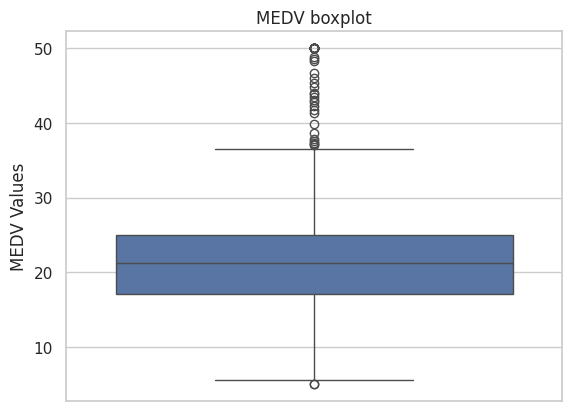

In [25]:
ax = sns.boxplot(y="MEDV", data=boston_df)
plt.title('MEDV boxplot')
plt.ylabel('MEDV Values')
plt.show()

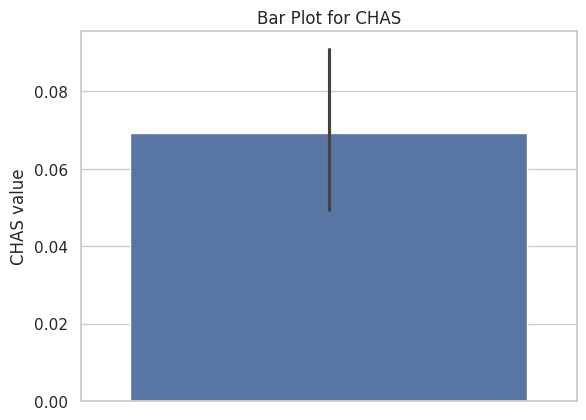

In [17]:
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_df)
plt.ylabel('CHAS value')
plt.title('Bar Plot for CHAS')
plt.show()

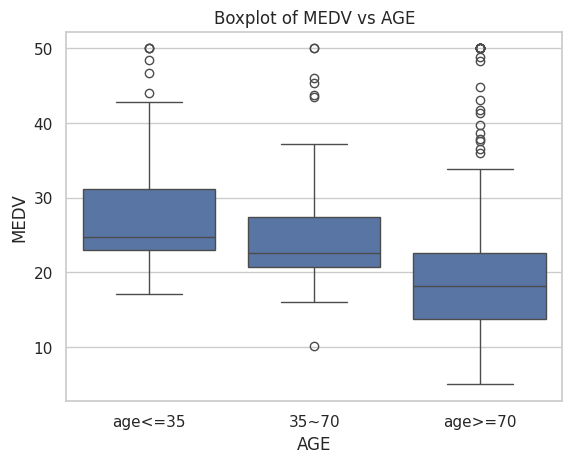

In [24]:
bins = [0, 35, 70, float('inf')]
labels = ['age<=35', '35~70', 'age>=70']
boston_df['AGE_seperate'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)


sns.boxplot(x='AGE_seperate', y='MEDV', data=boston_df,order=labels)
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.title('Boxplot of MEDV vs AGE')
plt.show()

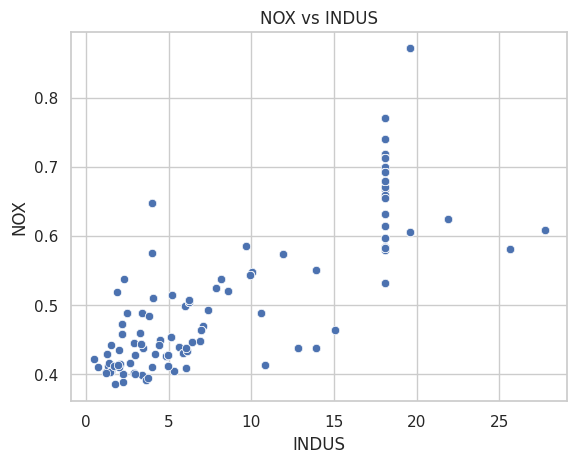

In [30]:
sns.set(style="whitegrid")
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.xlabel('INDUS')
plt.ylabel('NOX')
plt.title('NOX vs INDUS')
plt.show()
#From the scatter plot, it can be found that NOX is correlated with INDUS and the value of NOX is the largest when the value of INDUS is between 15 and 20.

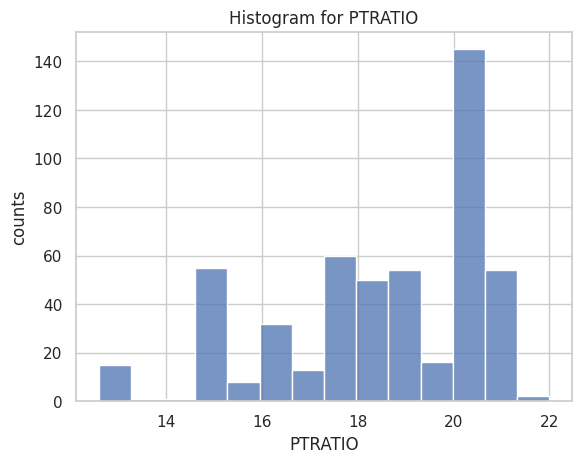

In [35]:
sns.set(style="whitegrid")
sns.histplot(x='PTRATIO',data=boston_df)
plt.xlabel('PTRATIO')
plt.ylabel('counts')
plt.title('Histogram for PTRATIO')
plt.show()



In [47]:
#Use α = 0.05
from scipy.stats import ttest_ind

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

#the p-value greater than 0.05,so, is is fail to reject the null hypothesis: There is no significant difference in MEDV between CHAS groups.

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [53]:
#now the year is 2023 , so the house build after 1940 means age<=83, house build before 1940 means age>83

boston_df.loc[(boston_df['AGE'] <= 83), 'age'] = 'after 1940'
boston_df.loc[(boston_df['AGE'] >= 83), 'age'] = 'before 1940'

scipy.stats.levene(boston_df[boston_df['age'] == 'after 1940']['MEDV'],
                   boston_df[boston_df['age'] == 'before 1940']['MEDV'],  
                   center='mean')

after1940= boston_df[boston_df['age'] == 'after 1940']['MEDV']
before1940 = boston_df[boston_df['age'] == 'before 1940']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(after1940, before1940)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

#the p-value greater than 0.05,so, is is fail to reject the null hypothesis: There is no significant difference in MEDV between bulid age before and after 1940.

F_Statistic: 65.51513325324017, P-Value: 4.354004757227418e-15


In [57]:
## X is the input variables (or independent variables)
X = boston_df['NOX']
## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

#R-square is 0.583, R will be √0.583, correlation coefficient is 0.76 . There is a strong correlation between the NOX and INDUS

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           7.91e-98
Time:                        13:13:56   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X = pd.get_dummies(boston_df[['DIS']])

y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

#the p-value xaller than 0.05 wich means is is statistically significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        13:19:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""